## Подготовка и анализ данных

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [28]:
df=pd.read_csv('dataset_ff_no_clean.csv')
df = df.drop(df.columns[0:3], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85543 entries, 0 to 85542
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   author                 85543 non-null  object 
 1   author_cl              85543 non-null  object 
 2   subsme                 85543 non-null  float64
 3   subs                   85543 non-null  float64
 4   total_like             85543 non-null  float64
 5   desq                   85543 non-null  object 
 6   link                   85543 non-null  object 
 7   date                   85543 non-null  object 
 8   prompt                 85543 non-null  object 
 9   link_to_image          85543 non-null  object 
 10  image_path             85543 non-null  object 
 11  like                   85543 non-null  float64
 12  comments               85543 non-null  int64  
 13  is_video               85543 non-null  float64
 14  path_to_image_cleaned  85543 non-null  object 
 15  li

In [29]:
# Выводим уникальные значения столбца is_video
print(df['is_video'].unique())

[0.]


In [30]:
df = df.drop('is_video', axis=1)

In [31]:
def detect_language(text):
    contains_cyrillic = bool(re.search('[а-яА-ЯёЁ]', text))
    contains_latin = bool(re.search('[a-zA-Z]', text))

    if contains_cyrillic and contains_latin:
        return 'кириллица и латиница'
    elif contains_cyrillic:
        return 'кириллица'
    elif contains_latin:
        return 'латиница'
    else:
        return 'неопределен'

# Применение функции к текстовому полю "prompt" в каждом датафрейме
df['language_prompt'] = df['prompt'].apply(detect_language)

# Применение функции к текстовому полю "description" в каждом датафрейме
df['language_description'] = df['desq'].apply(detect_language)

# Вывод результатов
print("Распределение языков в наборе данных по полю 'prompt':")
print(df['language_prompt'].value_counts())

print("Распределение языков в наборе данных по полю 'description':")
print(df['language_description'].value_counts())

undefined_text_examples_prompt = df[df['language_prompt'] == 'неопределен']['prompt'].head(3)
undefined_text_examples_description = df[df['language_description'] == 'неопределен']['desq'].head(3)

# Вывод примеров текста
print("Примеры текста с неопределенным языком в поле 'prompt':")
for i, text in enumerate(undefined_text_examples_prompt, start=1):
    print(f"Пример {i}:")
    print(text)
    print()

print("Примеры текста с неопределенным языком в поле 'description':")
for i, text in enumerate(undefined_text_examples_description, start=1):
    print(f"Пример {i}:")
    print(text)
    print()

Распределение языков в наборе данных по полю 'prompt':
кириллица и латиница    41279
кириллица               36147
латиница                 6070
неопределен              2047
Name: language_prompt, dtype: int64
Распределение языков в наборе данных по полю 'description':
кириллица               41644
неопределен             36432
кириллица и латиница     5663
латиница                 1804
Name: language_description, dtype: int64
Примеры текста с неопределенным языком в поле 'prompt':
Пример 1:
ㅤ

Пример 2:
가을. 산 으로 가는 길 의 왼쪽 에는 아름답고 다채로운 가을 나무 가 있는 경사 가 있다. 오른쪽의 나무를 통해 거대한 산이 보인다. 구름이 산에 모여들었다.

Пример 3:
ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ

Примеры текста с неопределенным языком в поле 'description':
Пример 1:
0

Пример 2:
0

Пример 3:
0



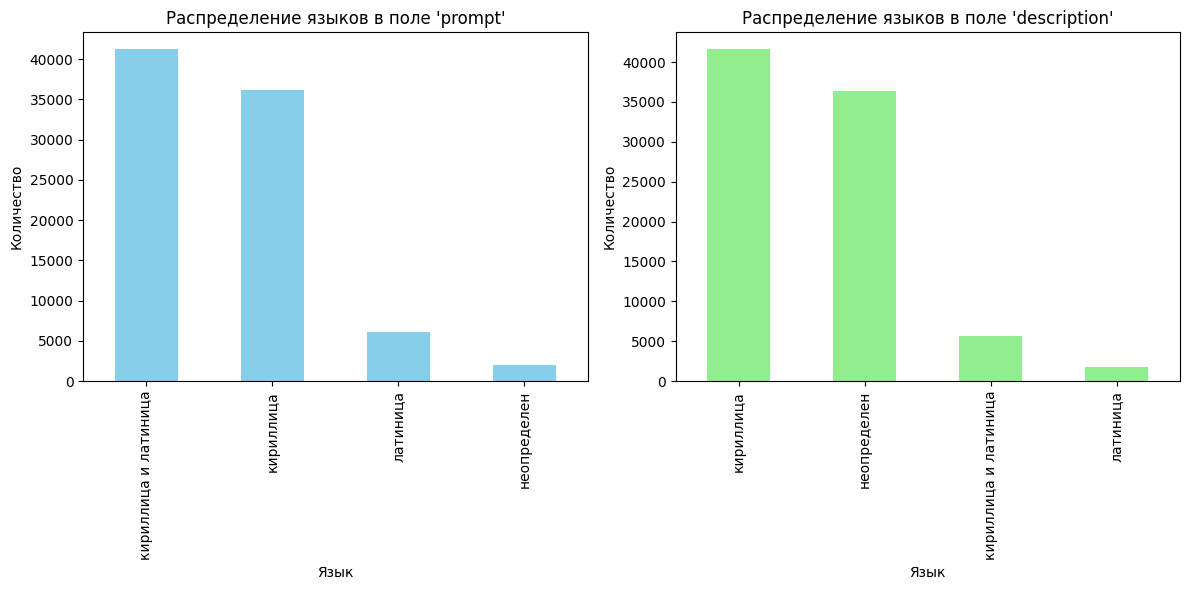

In [32]:
# Построение столбчатых диаграмм распределения языков
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['language_prompt'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Распределение языков в поле 'prompt'")
plt.xlabel("Язык")
plt.ylabel("Количество")

plt.subplot(1, 2, 2)
df['language_description'].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Распределение языков в поле 'description'")
plt.xlabel("Язык")
plt.ylabel("Количество")

plt.tight_layout()
plt.show()

In [42]:
undefined_non_zero_descriptions = df[(df['language_description'] == 'неопределен') & (df['desq'] != '0')]
count_undefined_non_zero_descriptions = len(undefined_non_zero_descriptions)

print(f"Количество текстов с неопределенным языком в поле 'description', отличных от символа 0: {count_undefined_non_zero_descriptions}")

print(undefined_non_zero_descriptions['desq'].head(5))

Количество текстов с неопределенным языком в поле 'description', отличных от символа 0: 2073
3337    💙
3338    💙
3339    💙
3340    💙
3341    💙
Name: desq, dtype: object


In [33]:
df = df[df['language_prompt'] != 'неопределен']

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83496 entries, 0 to 85542
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   author                 83496 non-null  object 
 1   author_cl              83496 non-null  object 
 2   subsme                 83496 non-null  float64
 3   subs                   83496 non-null  float64
 4   total_like             83496 non-null  float64
 5   desq                   83496 non-null  object 
 6   link                   83496 non-null  object 
 7   date                   83496 non-null  object 
 8   prompt                 83496 non-null  object 
 9   link_to_image          83496 non-null  object 
 10  image_path             83496 non-null  object 
 11  like                   83496 non-null  float64
 12  comments               83496 non-null  int64  
 13  path_to_image_cleaned  83496 non-null  object 
 14  likes_among_subs       83496 non-null  float64
 15  la

C:\Users\goral\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\goral\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\goral\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128330 (\N{DOVE OF PEACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\goral\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\goral\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from current font.
  fig.

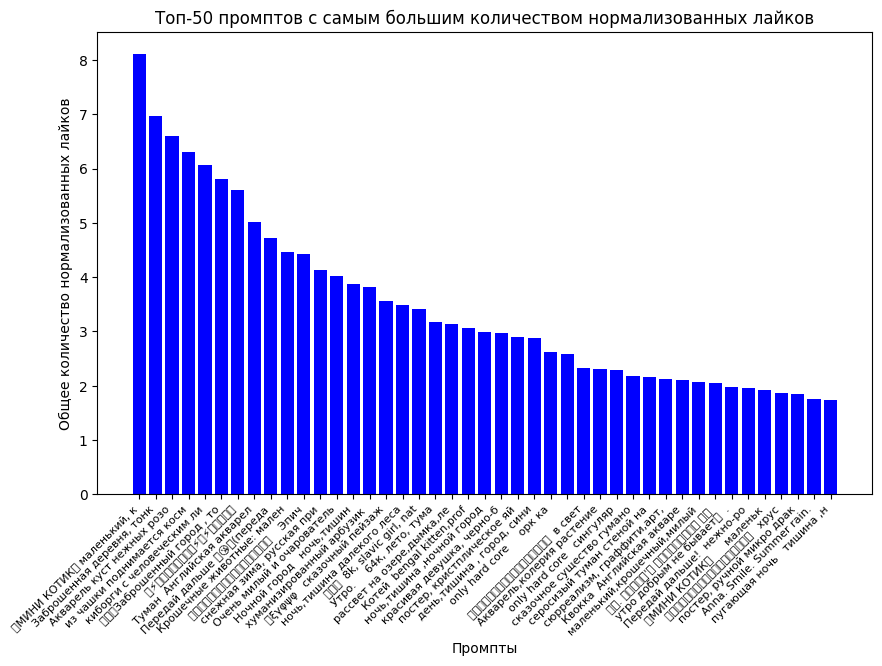

In [36]:
# Сортируем промпты по общему количеству нормализованных лайков
top_prompts_total = df.sort_values(by='likes_among_subs', ascending=False).head(50)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.bar(top_prompts_total['prompt'].str[:25], top_prompts_total['likes_among_subs'], color='blue')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xlabel('Промпты')
plt.ylabel('Общее количество нормализованных лайков')
plt.title('Топ-50 промптов с самым большим количеством нормализованных лайков')
plt.show()

C:\Users\goral\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\goral\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40857 (\N{CJK UNIFIED IDEOGRAPH-9F99}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\goral\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38632 (\N{CJK UNIFIED IDEOGRAPH-96E8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\goral\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26143 (\N{CJK UNIFIED IDEOGRAPH-661F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\goral\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12644 (\N{HANGUL FI

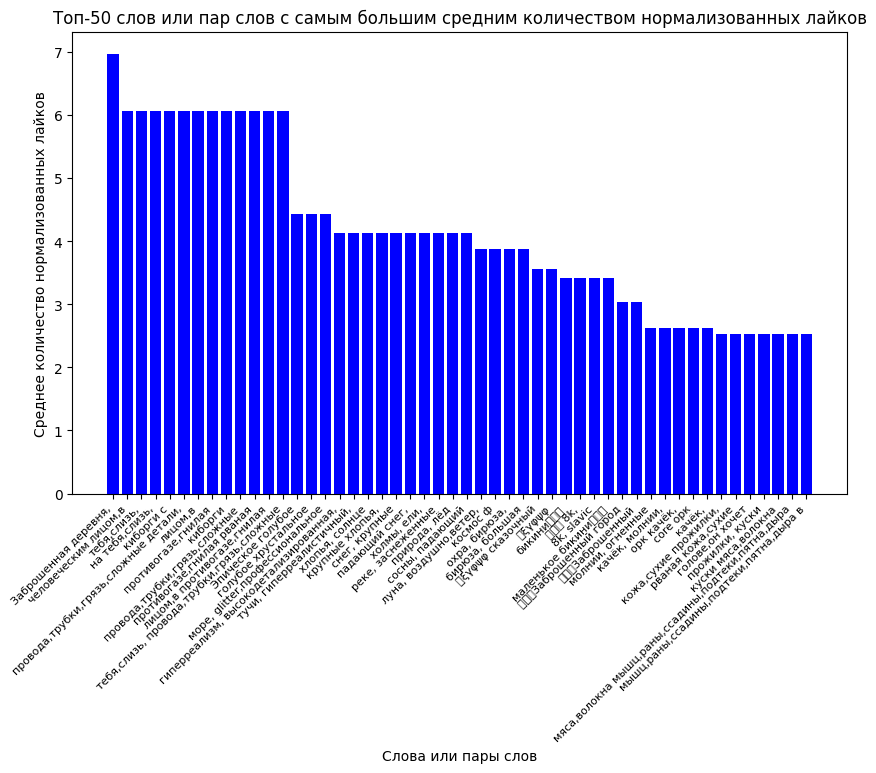

In [38]:
from collections import Counter
from itertools import islice

# Функция для получения пар слов
def get_word_pairs(text):
    words = text.split()
    return [' '.join(pair) for pair in zip(words, islice(words, 1, None))]

# Словарь для хранения количества лайков по словам и парам слов
word_likes = Counter()
word_counts = Counter()

# Обработка каждого промпта
for _, row in df.iterrows():
    prompt = row['prompt']
    likes = row['likes_among_subs']
    
    # Обработка отдельных слов
    for word in prompt.split():
        word_likes[word] += likes
        word_counts[word] += 1
        
    # Обработка пар слов
    for pair in get_word_pairs(prompt):
        word_likes[pair] += likes
        word_counts[pair] += 1

# Расчет средней оценки лайков для каждого слова и пары слов
average_likes = {word: word_likes[word] / word_counts[word] for word in word_likes}

# Преобразование в DataFrame для сортировки и визуализации
average_likes_df = pd.DataFrame(list(average_likes.items()), columns=['word_pair', 'average_likes'])
average_likes_df = average_likes_df.sort_values(by='average_likes', ascending=False).head(50)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.bar(average_likes_df['word_pair'], average_likes_df['average_likes'], color='blue')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xlabel('Слова или пары слов')
plt.ylabel('Среднее количество нормализованных лайков')
plt.title('Топ-50 слов или пар слов с самым большим средним количеством нормализованных лайков')
plt.show()

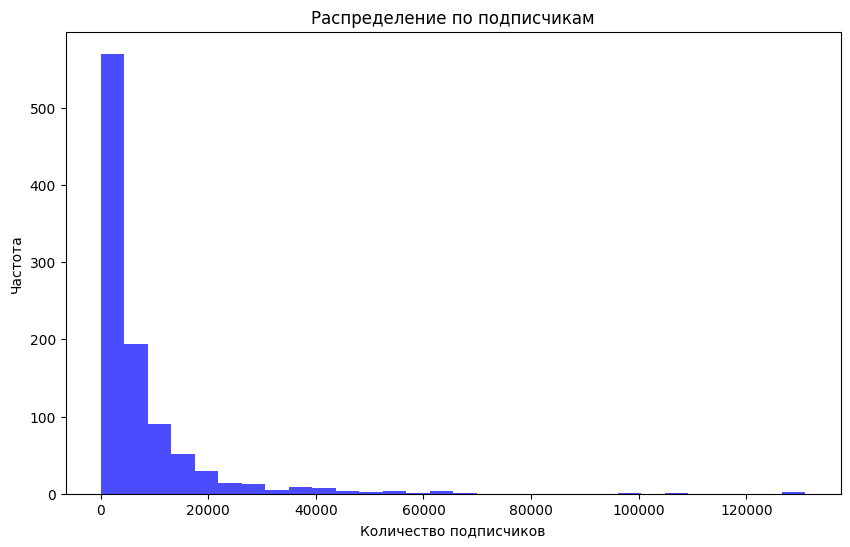

In [ ]:
# Визуализация подписчиков
plt.figure(figsize=(10, 6))
plt.hist(df['subs'], bins=30, color='blue', alpha=0.7)
plt.title('Распределение по подписчикам')
plt.xlabel('Количество подписчиков')
plt.ylabel('Частота')
plt.show()

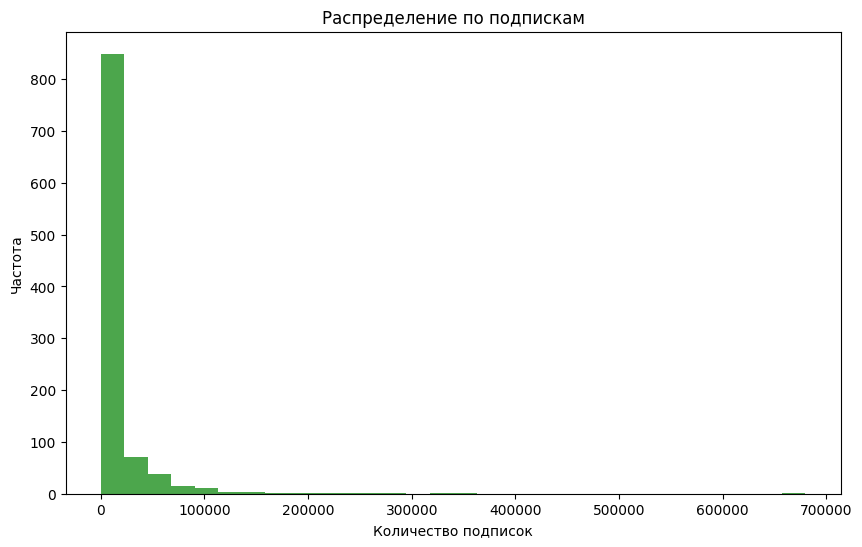

In [ ]:
# Визуализация подписок
plt.figure(figsize=(10, 6))
plt.hist(df['subsme'], bins=30, color='green', alpha=0.7)
plt.title('Распределение по подпискам')
plt.xlabel('Количество подписок')
plt.ylabel('Частота')
plt.show()

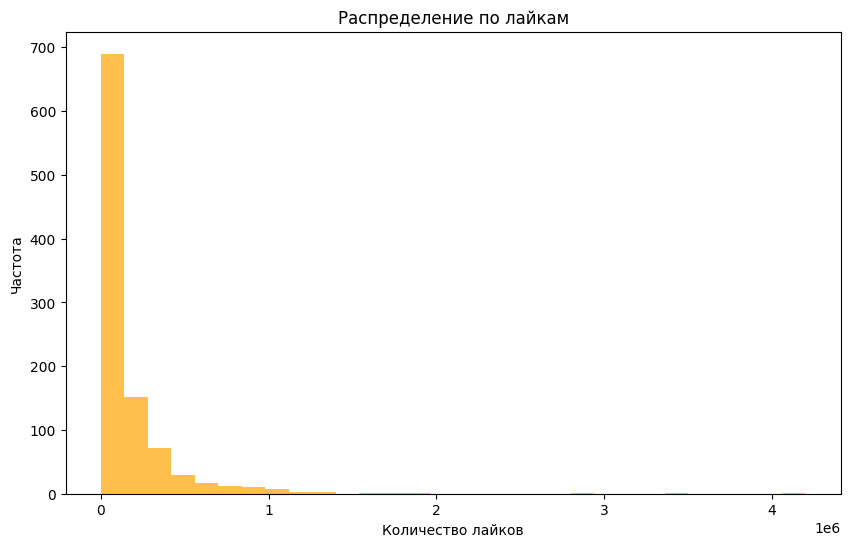

In [ ]:
# Визуализация лайков
plt.figure(figsize=(10, 6))
plt.hist(df['like'], bins=30, color='orange', alpha=0.7)
plt.title('Распределение по лайкам')
plt.xlabel('Количество лайков')
plt.ylabel('Частота')
plt.show()

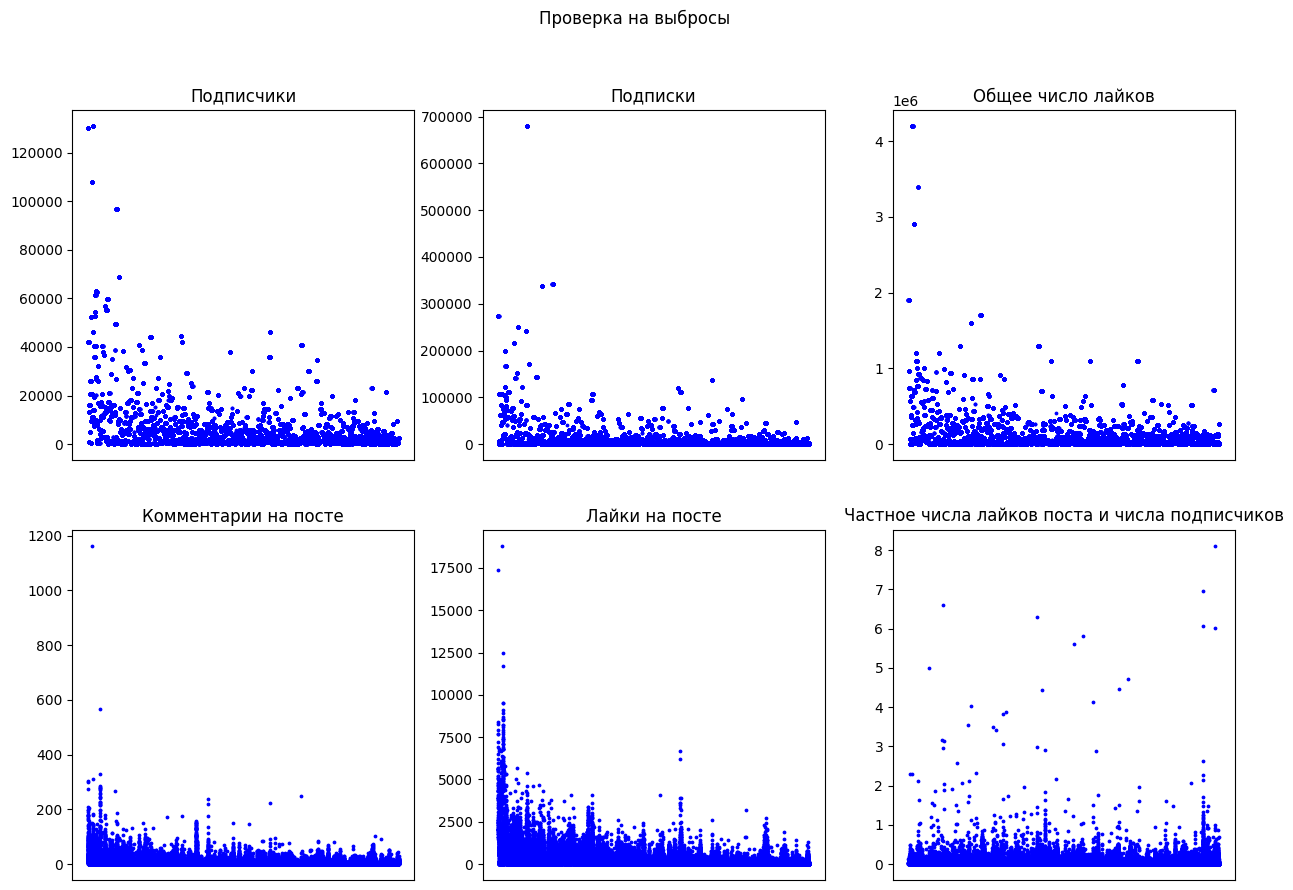

In [45]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[15, 10])

fig.suptitle('Проверка на выбросы')

# График для подписчиков
axs[0, 0].scatter(range(len(df['subs'])), df['subs'], s=3, color='blue')
axs[0, 0].set_title('Подписчики')
axs[0, 0].set_xticks([])  # Убираем подписи по оси x

# График для subsme
axs[0, 1].scatter(range(len(df['subsme'])), df['subsme'], s=3, color='blue')
axs[0, 1].set_title('Подписки')
axs[0, 1].set_xticks([])  # Убираем подписи по оси x

# График для total_like
axs[0, 2].scatter(range(len(df['total_like'])), df['total_like'], s=3, color='blue')
axs[0, 2].set_title('Общее число лайков')
axs[0, 2].set_xticks([])  # Убираем подписи по оси x

# График для комментариев
axs[1, 0].scatter(range(len(df['comments'])), df['comments'], s=3, color='blue')
axs[1, 0].set_title('Комментарии на посте')
axs[1, 0].set_xticks([])  # Убираем подписи по оси x

# График для лайков
axs[1, 1].scatter(range(len(df['like'])), df['like'], s=3, color='blue')
axs[1, 1].set_title('Лайки на посте')
axs[1, 1].set_xticks([])  # Убираем подписи по оси x

# Пустой график в последней ячейке, чтобы убрать подпись с оси y
# График для лайков
axs[1, 2].scatter(range(len(df['likes_among_subs'])), df['likes_among_subs'], s=3, color='blue')
axs[1, 2].set_title('Частное числа лайков поста и числа подписчиков')
axs[1, 2].set_xticks([])  # Убираем подписи по оси x

plt.show()

In [46]:
df1 = df.copy()

In [50]:
df = df1.copy()

In [51]:
from scipy.stats import zscore

# Определение границ для удаления выбросов
z_score_threshold = 3

# Удаление выбросов из числовых признаков
numeric_features = ['subsme', 'subs', 'total_like', 'comments', 'like', 'likes_among_subs']

df = df[(np.abs(zscore(df[numeric_features])) < z_score_threshold).all(axis=1)]

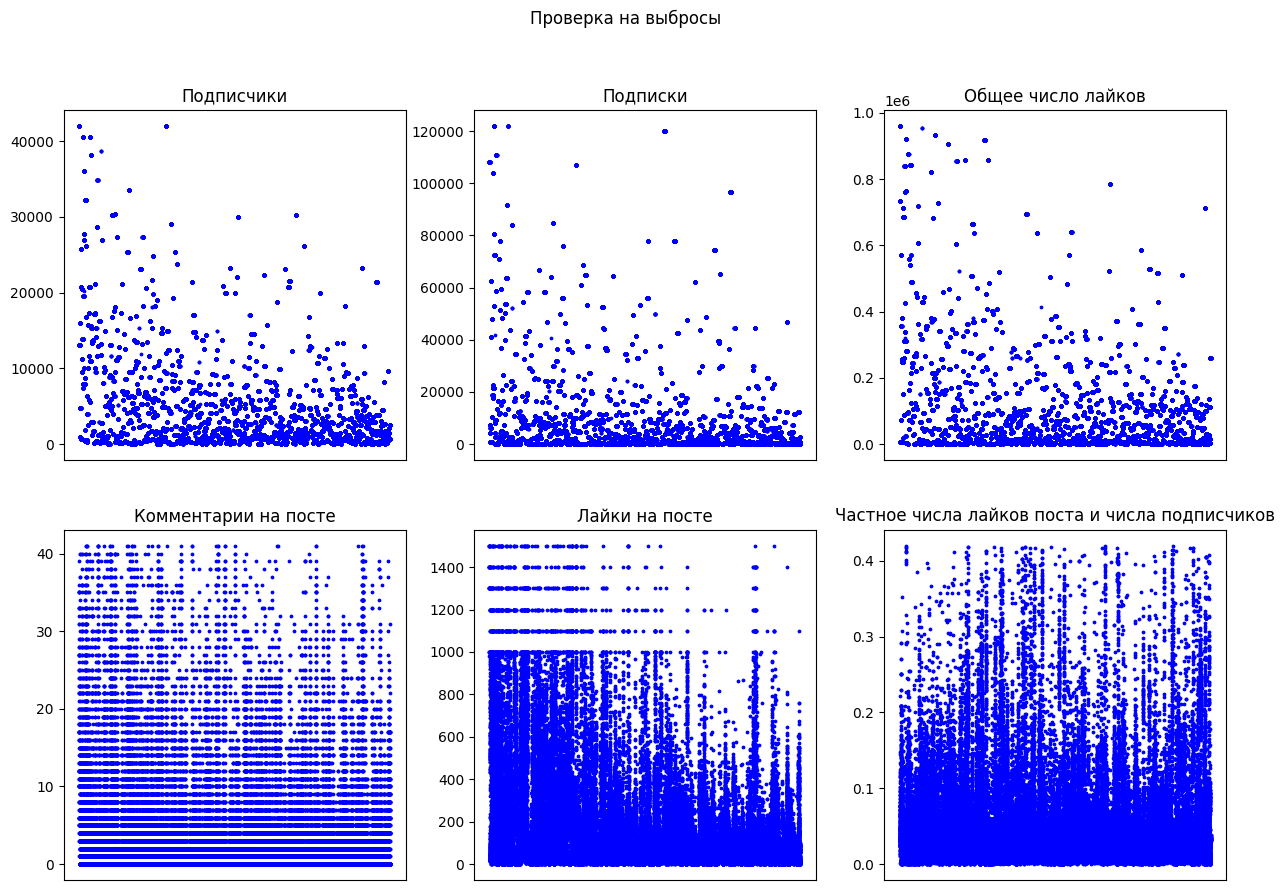

In [52]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[15, 10])

fig.suptitle('Проверка на выбросы')

# График для подписчиков
axs[0, 0].scatter(range(len(df['subs'])), df['subs'], s=3, color='blue')
axs[0, 0].set_title('Подписчики')
axs[0, 0].set_xticks([])  # Убираем подписи по оси x

# График для subsme
axs[0, 1].scatter(range(len(df['subsme'])), df['subsme'], s=3, color='blue')
axs[0, 1].set_title('Подписки')
axs[0, 1].set_xticks([])  # Убираем подписи по оси x

# График для total_like
axs[0, 2].scatter(range(len(df['total_like'])), df['total_like'], s=3, color='blue')
axs[0, 2].set_title('Общее число лайков')
axs[0, 2].set_xticks([])  # Убираем подписи по оси x

# График для комментариев
axs[1, 0].scatter(range(len(df['comments'])), df['comments'], s=3, color='blue')
axs[1, 0].set_title('Комментарии на посте')
axs[1, 0].set_xticks([])  # Убираем подписи по оси x

# График для лайков
axs[1, 1].scatter(range(len(df['like'])), df['like'], s=3, color='blue')
axs[1, 1].set_title('Лайки на посте')
axs[1, 1].set_xticks([])  # Убираем подписи по оси x

# Пустой график в последней ячейке, чтобы убрать подпись с оси y
# График для лайков
axs[1, 2].scatter(range(len(df['likes_among_subs'])), df['likes_among_subs'], s=3, color='blue')
axs[1, 2].set_title('Частное числа лайков поста и числа подписчиков')
axs[1, 2].set_xticks([])  # Убираем подписи по оси x

plt.show()

In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78907 entries, 112 to 85542
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   author                 78907 non-null  object 
 1   author_cl              78907 non-null  object 
 2   subsme                 78907 non-null  float64
 3   subs                   78907 non-null  float64
 4   total_like             78907 non-null  float64
 5   desq                   78907 non-null  object 
 6   link                   78907 non-null  object 
 7   date                   78907 non-null  object 
 8   prompt                 78907 non-null  object 
 9   link_to_image          78907 non-null  object 
 10  image_path             78907 non-null  object 
 11  like                   78907 non-null  float64
 12  comments               78907 non-null  int64  
 13  is_video               78907 non-null  float64
 14  path_to_image_cleaned  78907 non-null  object 
 15  

In [54]:
from sklearn.preprocessing import StandardScaler

# Предположим, что numeric_features содержит имена числовых признаков в DataFrame df
numeric_features = ['subsme', 'subs', 'total_like', 'comments', ]

# Создание экземпляра StandardScaler
scaler = StandardScaler()

# Стандартизация данных
scaled_data = scaler.fit_transform(df[numeric_features])

# Замена столбцов в DataFrame df стандартизованными значениями
df[numeric_features] = scaled_data

In [56]:
df.reset_index(drop=True)
# Удаляем столбец 'is_video'
df = df.drop('is_video', axis=1)

<Axes: >

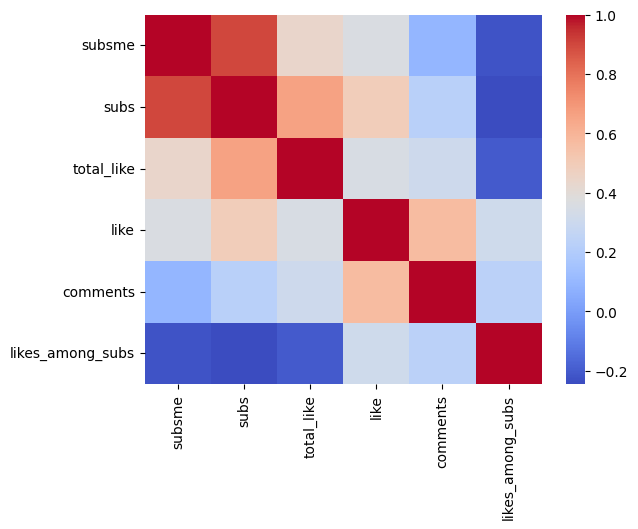

In [57]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')

In [58]:
df.to_csv('dataswt_ff_fcleaned.csv')

## Анализ параметров

In [1]:
import tensorflow as tf

import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dataswt_ff_fcleaned.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78907 entries, 0 to 78906
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             78907 non-null  int64  
 1   author                 78907 non-null  object 
 2   author_cl              78907 non-null  object 
 3   subsme                 78907 non-null  float64
 4   subs                   78907 non-null  float64
 5   total_like             78907 non-null  float64
 6   desq                   78907 non-null  object 
 7   link                   78907 non-null  object 
 8   date                   78907 non-null  object 
 9   prompt                 78907 non-null  object 
 10  link_to_image          78907 non-null  object 
 11  image_path             78907 non-null  object 
 12  like                   78907 non-null  float64
 13  comments               78907 non-null  float64
 14  path_to_image_cleaned  78907 non-null  object 
 15  li

In [4]:
# Подготовка данных для MinMax нормализации
X = df[['subsme', 'subs', 'total_like', 'comments']].values
y = df['like'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test))

63125 15782


In [6]:
print(len(X_train[0]))

4


In [25]:
# Создаем входной слой
inputs = tf.keras.Input(shape=(len(X_train[0]),))

# Промежуточные слои
x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(inputs)

x = tf.keras.layers.Concatenate()([x, inputs])
x1 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

x1 = tf.keras.layers.Concatenate()([x1, x])
x2 = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x1)

x2 = tf.keras.layers.Concatenate()([x2, x1])
x3 = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x2)

# Выходной слой
outputs = tf.keras.layers.Dense(1, activation='linear')(x3)

# Создаем функциональную модель
model_functional = tf.keras.Model(inputs=inputs, outputs=outputs)

# Компилируем модель с оптимизатором Adam, функцией потерь MSE и метрикой MAE
model_functional.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Получаем сводку по модели
model_functional.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense_28 (Dense)            (None, 128)                  640       ['input_7[0][0]']             
                                                                                                  
 concatenate_16 (Concatenat  (None, 132)                  0         ['dense_28[0][0]',            
 e)                                                                  'input_7[0][0]']             
                                                                                                  
 dense_29 (Dense)            (None, 64)                   8512      ['concatenate_16[0][0]']

In [ ]:
history = model_functional.fit(x=X_train, y=y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

494/494 [==============================] - 1s 2ms/step - loss: 11704.4473 - mae: 54.6782
Test Loss: [11704.447265625, 54.67817306518555]
494/494 [==============================] - 1s 1ms/step
Mean Squared Error (MSE): 11400.78327806313
R-squared: 0.6717301453939165
Mean Absolute Error (MAE): 54.678202751667506


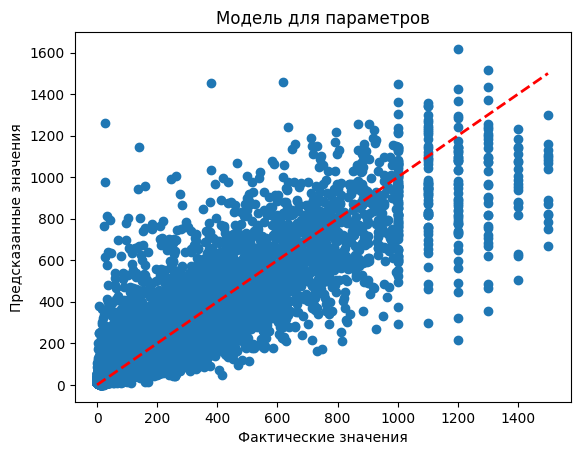

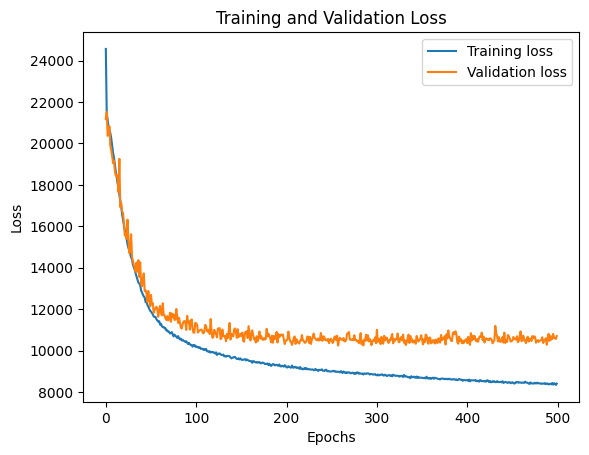

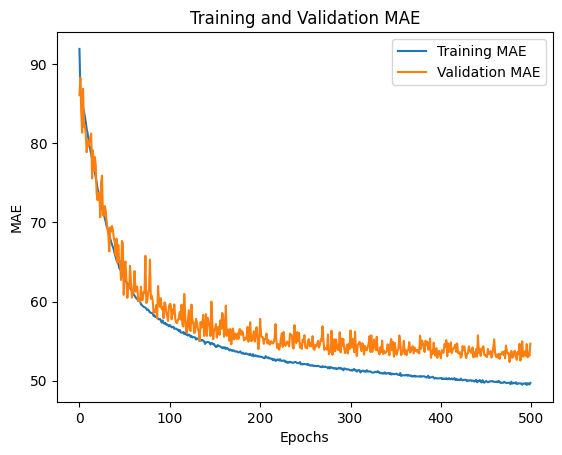

In [21]:
loss = model_functional.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Прогнозирование
predictions = model_functional.predict(X_test)


# Вычисление среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Вычисление коэффициента детерминации (R-squared)
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

# Вычисление средней абсолютной ошибки (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Модель для параметров')
plt.show()

# Вывод графика обучения и валидации по эпохам
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Вывод графика изменения MAE по эпохам
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [24]:
model_functional.save('variable_model_v4')

INFO:tensorflow:Assets written to: variable_model_v4\assets


INFO:tensorflow:Assets written to: variable_model_v4\assets


## Анализ текста

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('dataswt_ff_fcleaned.csv')

In [13]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78907 entries, 0 to 78906
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             78907 non-null  int64  
 1   author                 78907 non-null  object 
 2   author_cl              78907 non-null  object 
 3   subsme                 78907 non-null  float64
 4   subs                   78907 non-null  float64
 5   total_like             78907 non-null  float64
 6   desq                   78907 non-null  object 
 7   link                   78907 non-null  object 
 8   date                   78907 non-null  object 
 9   prompt                 78907 non-null  object 
 10  link_to_image          78907 non-null  object 
 11  image_path             78907 non-null  object 
 12  like                   78907 non-null  float64
 13  comments               78907 non-null  float64
 14  path_to_image_cleaned  78907 non-null  object 
 15  li

In [14]:
!pip install sentence_transformers -q

In [15]:
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

# Инициализация модели SentenceTransformer
model = SentenceTransformer('intfloat/multilingual-e5-small')

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

c:\Users\goral\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\goral\.cache\huggingface\hub\models--intfloat--multilingual-e5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


README.md:   0%|          | 0.00/160k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

In [16]:
# Объединение текста из 'prompt' и 'desq' с добавлением префикса "query: "
df['combined_text'] = 'query: ' + df['prompt'] + ' ' + df['desq']

In [17]:
# Преобразование текста в векторные представления с прогресс баром
embeddings = []
for text in tqdm(df['combined_text'].tolist()):
    embeddings.append(model.encode(text, normalize_embeddings=True))

100%|██████████| 78907/78907 [1:41:20<00:00, 12.98it/s]  


In [21]:
import pickle

# Сохранение embeddings в файл
with open('embeddings.pkl', 'wb') as file:
    pickle.dump(embeddings, file)

In [ ]:
# Преобразование векторов в DataFrame
embeddings_df = pd.DataFrame(embeddings, index=df.index)

# Объединение с исходным DataFrame, если необходимо
result_df = pd.concat([df, embeddings_df], axis=1)

# Вывод результата
print(result_df)

In [73]:
print(len(embeddings[0]))

384


In [74]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Dense, Concatenate, Reshape, Dropout

from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2

import numpy as np

In [75]:
# Преобразование векторов в numpy.ndarray
embeddings_array = np.array(embeddings)

In [42]:
df['likes_among_subs_new'] = df['like'] / df['subs']

In [76]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78907 entries, 0 to 78906
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                78907 non-null  int64  
 1   author                    78907 non-null  object 
 2   author_cl                 78907 non-null  object 
 3   subsme                    78907 non-null  float64
 4   subs                      78907 non-null  float64
 5   total_like                78907 non-null  float64
 6   desq                      78907 non-null  object 
 7   link                      78907 non-null  object 
 8   date                      78907 non-null  object 
 9   prompt                    78907 non-null  object 
 10  link_to_image             78907 non-null  object 
 11  image_path                78907 non-null  object 
 12  like                      78907 non-null  float64
 13  comments                  78907 non-null  float64
 14  path_t

In [77]:
df['likes_among_subs_hundred'] = df['likes_among_subs'] * 100

In [78]:
X = embeddings_array#.values
y = df['likes_among_subs_hundred'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test))

63125 15782


In [ ]:
# Создаем входной слой
inputs = tf.keras.Input(shape=(len(X_train[0]),))

# Промежуточные слои
x = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(inputs)

x = tf.keras.layers.Concatenate()([x, inputs])

x0 = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

x0 = tf.keras.layers.Concatenate()([x0, x])

x00 = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x0)

x00 = tf.keras.layers.Concatenate()([x00, x0])
x1 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x00)

x1 = tf.keras.layers.Concatenate()([x1, x])
x2 = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x1)

x2 = tf.keras.layers.Concatenate()([x2, x1])
x3 = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x2)

# Выходной слой
outputs = tf.keras.layers.Dense(1, activation='linear')(x3)

# Создаем функциональную модель
model_functional = tf.keras.Model(inputs=inputs, outputs=outputs)

# Компилируем модель с оптимизатором Adam, функцией потерь MSE и метрикой MAE
model_functional.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Получаем сводку по модели
model_functional.summary()

In [80]:
print(type(embeddings))
print(type(embeddings_array))

<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

In [37]:
import matplotlib.pyplot as plt  
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

494/494 [==============================] - 2s 3ms/step - loss: 24.5708 - mae: 2.7856
Test Loss: [24.570802688598633, 2.7856428623199463]
494/494 [==============================] - 2s 3ms/step
Mean Squared Error (MSE): 20.566021836980507
R-squared: 0.40470070061066477
Mean Absolute Error (MAE): 2.785641952747809


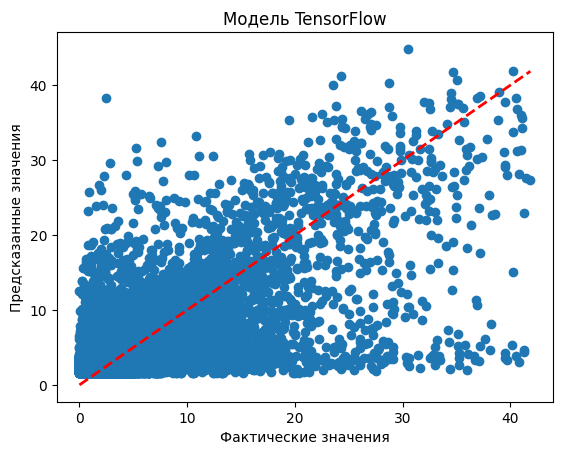

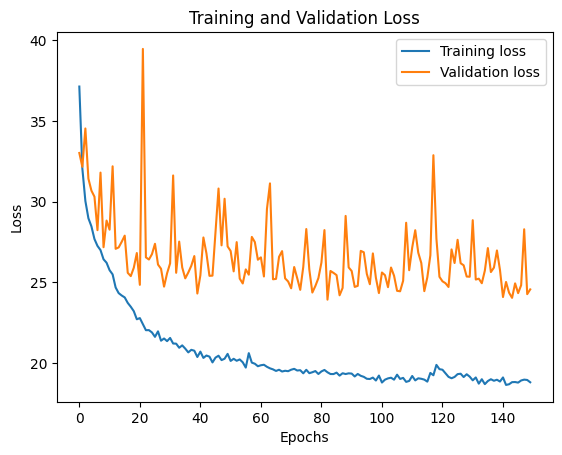

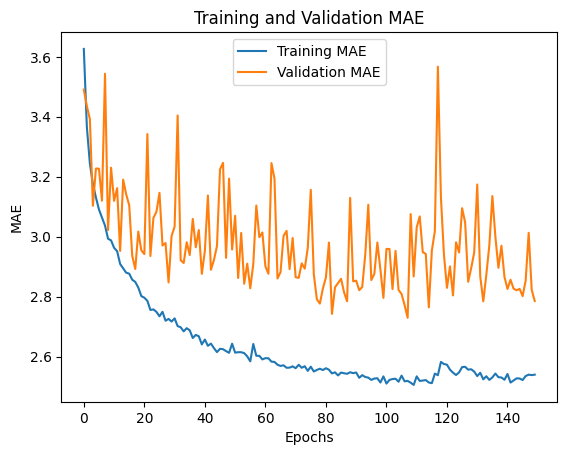

In [71]:
# Оценка модели
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Прогнозирование
predictions = model.predict(X_test)


# Вычисление среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Вычисление коэффициента детерминации (R-squared)
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

# Вычисление средней абсолютной ошибки (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Модель TensorFlow')
plt.show()

# Вывод графика обучения и валидации по эпохам
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Вывод графика изменения MAE по эпохам
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [ ]:
model.save('model_text_v4.h5')

## Модель для изображений

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Add, GlobalAveragePooling2D, Dense
from keras.layers import Activation, Input
from keras.models import Model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
df = pd.read_csv ('dataswt_ff_fcleaned.csv')

In [ ]:
# Преобразование изображений в массивы numpy
X_images = np.array([np.array(Image.open(path)) for path in tqdm(df['path_to_image_cleaned'].tolist())])
y = df['likes_among_subs_hundred'].values

In [ ]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_images, y, test_size=0.2, random_state=42)


In [ ]:
# Создание модели
inputs = Input(shape=(96, 96, 3))

# Первый стандартный слой CNN
x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
x = MaxPooling2D((2, 2), padding='same')(x) 

# Создание ResNet блоков
for _ in range(6): 
    x_input = x
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same')(x) 
    x = BatchNormalization()(x)
    x = Add()([x, x_input])
    x = Activation('relu')(x)

# Последний слой
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation = 'relu')(x)

outputs = Dense(1, activation= 'linear')(x)

model = Model(inputs=inputs, outputs=outputs)

# Обучение модели
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Обучение модели
history = model.fit(x=X_train, y=y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
488/488 [==============================] - 2814s 6s/step - loss: 8.9326 - mae: 2.3329 - val_loss: 10.1589 - val_mae: 2.2073
Epoch 2/10
488/488 [==============================] - 2717s 6s/step - loss: 8.7758 - mae: 2.3137 - val_loss: 8.7558 - val_mae: 2.3632
Epoch 3/10
488/488 [==============================] - 2721s 6s/step - loss: 8.7436 - mae: 2.3076 - val_loss: 9.0202 - val_mae: 2.2409
Epoch 4/10
488/488 [==============================] - 2723s 6s/step - loss: 8.7268 - mae: 2.3070 - val_loss: 8.8879 - val_mae: 2.2258
Epoch 5/10
488/488 [==============================] - 2729s 6s/step - loss: 8.7370 - mae: 2.3034 - val_loss: 8.8773 - val_mae: 2.2645
Epoch 6/10
488/488 [==============================] - 2725s 6s/step - loss: 8.7087 - mae: 2.3036 - val_loss: 8.7424 - val_mae: 2.3639
Epoch 7/10
488/488 [==============================] - 2717s 6s/step - loss: 8.6890 - mae: 2.3030 - val_loss: 8.8268 - val_mae: 2.2743
Epoch 8/10
488/488 [==============================] - 2754s 6

55/55 [==============================] - 54s 960ms/step
MSE: 9.019701929229127
MAE: 2.3008111575387193
r2: -0.021520654228937675


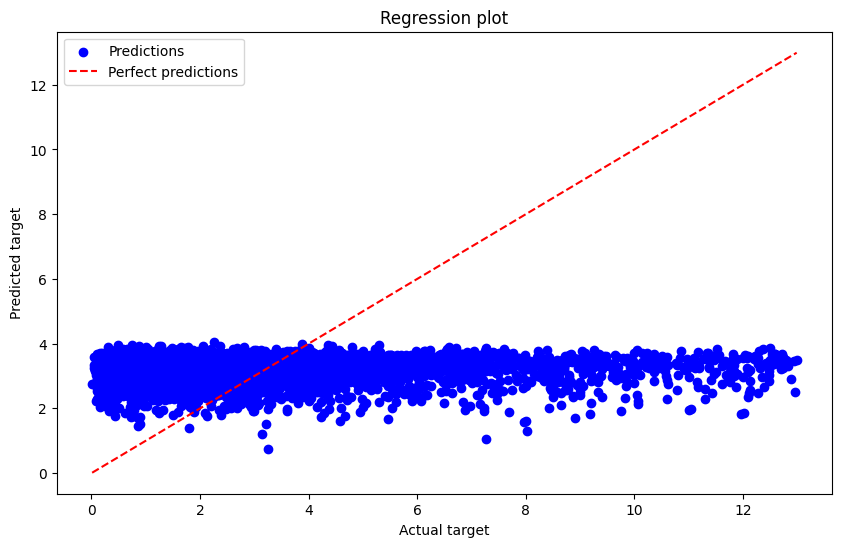

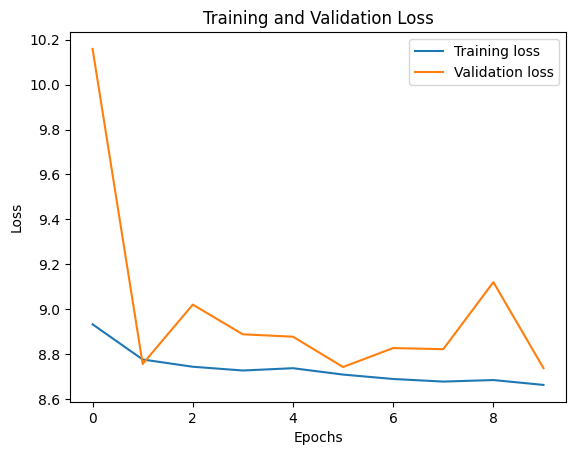

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Получение предсказаний на валидационных данных
y_pred = model.predict(X_test)
y_true = y_test

# Вычисление метрик
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'r2: {r2}')

# Построение графика регрессии
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, color='blue', label='Predictions')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Perfect predictions')
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.title('Regression plot')
plt.legend()
plt.show()

# Вывод графика обучения и валидации по эпохам
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
model.save('image_model_v3.h5')

## Многофакторная модель

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
#from sentence_transformers import SentenceTransformer
from PIL import Image
import keras

In [ ]:
# Инициализация модели SentenceTransformer
#model = SentenceTransformer('intfloat/multilingual-e5-small')

c:\Users\Koftarik\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\Koftarik\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
df = pd.read_csv ('dataswt_ff_fcleaned.csv')

In [ ]:
# Объединение текста из 'prompt' и 'desq' с добавлением префикса "query: "
df['combined_text'] = 'query: ' + df['prompt'] + ' ' + df['desq']

In [ ]:
"""# Преобразование текста в векторные представления с прогресс баром
embeddings = []
for text in tqdm(df['combined_text'].tolist()):
    embeddings.append(model.encode(text, normalize_embeddings=True))"""

In [ ]:
# Загружаем модель
loaded_model = keras.models.load_model('models/text_model_v4.h5')
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 384)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 512)                  197120    ['input_1[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 896)                  0         ['dense[0][0]',               
                                                                     'input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 256)                  229632    ['concatenate[0][0]']     

In [ ]:
text_model = loaded_model

In [ ]:
# Удаляем последний слой
text_model = tf.keras.Model(inputs=loaded_model.inputs, outputs=loaded_model.layers[-2].output)

# Замораживаем веса некоторых слоев (например, первые 5 слоев)
for layer in text_model.layers:
    layer.trainable = False

text_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
text_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 384)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 512)                  197120    ['input_1[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 896)                  0         ['dense[0][0]',               
                                                                     'input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 256)                  229632    ['concatenate[0][0]']     

In [ ]:
# Загружаем модель
loaded_model = keras.models.load_model('models/variable_model_v4.h5')
loaded_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense_23 (Dense)            (None, 256)                  1280      ['input_6[0][0]']             
                                                                                                  
 concatenate_13 (Concatenat  (None, 260)                  0         ['dense_23[0][0]',            
 e)                                                                  'input_6[0][0]']             
                                                                                                  
 dense_24 (Dense)            (None, 128)                  33408     ['concatenate_13[0][0]']

In [ ]:
table_model = loaded_model 

In [ ]:
loaded_model = keras.models.load_model('models/variable_model_v4.h5')

# Удаляем последний слой
table_model = tf.keras.Model(inputs=loaded_model.inputs, outputs=loaded_model.layers[-2].output)

# Замораживаем веса слоев 
for layer in table_model.layers:
    layer.trainable = False

table_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
table_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense_23 (Dense)            (None, 256)                  1280      ['input_6[0][0]']             
                                                                                                  
 concatenate_13 (Concatenat  (None, 260)                  0         ['dense_23[0][0]',            
 e)                                                                  'input_6[0][0]']             
                                                                                                  
 dense_24 (Dense)            (None, 128)                  33408     ['concatenate_13[0][0]']

In [ ]:
# Загружаем модель
loaded_model = keras.models.load_model('models/image_model_v4.h5')
loaded_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 conv2d_44 (Conv2D)          (None, 96, 96, 32)           896       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_44 (Ba  (None, 96, 96, 32)           128       ['conv2d_44[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 conv2d_45 (Conv2D)          (None, 96, 96, 64)           18496     ['batch_normalization_44

In [ ]:
image_model = loaded_model

In [ ]:
# Удаляем последний слой
image_model = tf.keras.Model(inputs=loaded_model.inputs, outputs=loaded_model.layers[-2].output)

# Замораживаем веса некоторых слоев (например, первые 5 слоев)
for layer in image_model.layers:
    layer.trainable = False

image_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
image_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 conv2d_44 (Conv2D)          (None, 96, 96, 32)           896       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_44 (Ba  (None, 96, 96, 32)           128       ['conv2d_44[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 conv2d_45 (Conv2D)          (None, 96, 96, 64)           18496     ['batch_normalization_44

In [ ]:
df['path_to_image_cleaned'] = df['path_to_image_cleaned'].str.replace("D:/hse_course/diploma_v2/", "")

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78907 entries, 0 to 78906
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             78907 non-null  int64  
 1   author                 78907 non-null  object 
 2   author_cl              78907 non-null  object 
 3   subsme                 78907 non-null  float64
 4   subs                   78907 non-null  float64
 5   total_like             78907 non-null  float64
 6   desq                   78907 non-null  object 
 7   link                   78907 non-null  object 
 8   date                   78907 non-null  object 
 9   prompt                 78907 non-null  object 
 10  link_to_image          78907 non-null  object 
 11  image_path             78907 non-null  object 
 12  like                   78907 non-null  float64
 13  comments               78907 non-null  float64
 14  path_to_image_cleaned  78907 non-null  object 
 15  li

In [ ]:
def create_combined_model(table_model, text_model, image_model):
    # Входные слои для каждого типа данных
    table_input = tf.keras.layers.Input(shape=(4,), name='table_input')
    text_input = tf.keras.layers.Input(shape=(384), name='text_input')
    image_input = tf.keras.layers.Input(shape=(96, 96, 3), name='image_input')
    
    # Получение выходов от предобученных моделей
    table_output = table_model(table_input)
    text_output = text_model(text_input)
    image_output = image_model(image_input)
    
    # Объединение выходов
    merged = tf.keras.layers.concatenate([table_output, text_output, image_output])
    
    # Скрытые слои и выходной слой для итоговой модели
    hidden = tf.keras.layers.Dense(96, activation='relu')(merged)
    hidden2 = tf.keras.layers.Dense(32, activation='relu')(hidden)

    output = tf.keras.layers.Dense(1, activation='linear', name='output')(hidden2)
    
    # Создание итоговой модели
    model = tf.keras.Model(inputs=[table_input, text_input, image_input], outputs=output)
    
    return model

In [ ]:
#text_embeddings = np.array([model_bert.encode(text, normalize_embeddings=True) for text in tqdm(df['combined_text'].tolist())])

import pickle

# Путь к файлу embeddings.pkl
file_path = 'C:/Users/Koftarik/Desktop/diploma/embeddings.pkl'

# Открытие файла для чтения
with open(file_path, 'rb') as file:
    # Чтение данных из файла
    text_embeddings = pickle.load(file)

text_embeddings = np.array(text_embeddings)

In [ ]:
# Преобразование изображений в массивы numpy
X_images = np.array([np.array(Image.open(path)) for path in tqdm(df['path_to_image_cleaned'].tolist())])

100%|██████████| 78907/78907 [08:37<00:00, 152.42it/s]


In [ ]:
# Табличные данные
table_data = df[['subs', 'subsme', 'total_like', 'comments']].values

# Целевая переменная
target_data = df['like'].values


In [ ]:
lau = df['likes_among_subs']
lau_train, lau_test = train_test_split(lau, test_size=0.2, random_state=42)

In [ ]:
# Разделение данных на тренировочную и тестовую выборки
table_train, table_test, text_train, text_test, image_train, image_test, target_train, target_test = train_test_split(
    table_data, text_embeddings, X_images, target_data, test_size=0.2, random_state=42
)

In [ ]:
print(len(table_test), len(table_train))

15782 63125


In [ ]:
# Создание итоговой модели
final_model = create_combined_model(table_model, text_model, )#image_model)

# Компиляция модели
final_model.compile(optimizer='adam', loss='mse', metrics='mae')

In [ ]:
# Обучение модели
history = final_model.fit(
    {
        'table_input': table_train,
        'text_input': text_train,
        'image_input': image_train
    },
    target_train,
    epochs=100,
    batch_size=32,
    validation_data=(
        {
            'table_input': table_test,
            'text_input': text_test,
            'image_input': image_test
        },
        target_test
    )
)

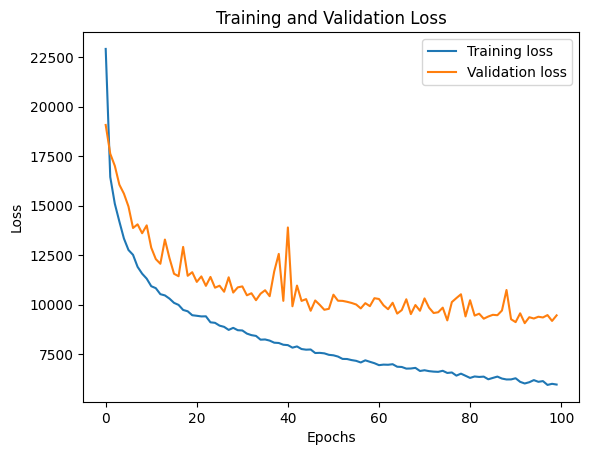

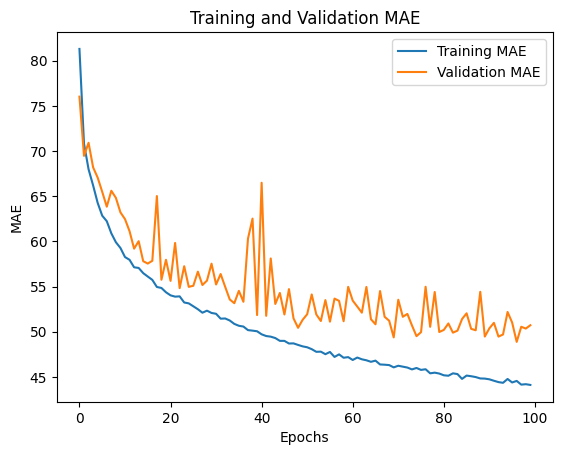

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']


# Вывод графика обучения и валидации по эпохам
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Вывод графика обучения и валидации по эпохам
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Получение предсказаний на валидационных данных
y_pred = model.predict(X_test)
y_true = y_test

# Вычисление метрик
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'r2: {r2}')

MSE: 9460.140221875
MAE: 50.71443115234375
r2: 0.74761287379102


In [ ]:
validation_data=(
    {
        'table_input': table_test,
        'text_input': text_test,
        'image_input': image_test
    },)

In [ ]:
lau_test = lau_test*100

In [ ]:
lau_test = np.array(lau_test)

In [ ]:
print(type(validation_data))
print(type(target_test))
print(type(lau_test))

<class 'tuple'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
import random
amongus = []
# Выбор 10 случайных элементов из validation_data
random_elements = random.sample(range(len(validation_data[0]['table_input'])), 20)
a = 0
# Предсказание для выбранных элементов
for idx in random_elements:
    table_inputs = validation_data[0]['table_input'][random_elements]
    text_inputs = validation_data[0]['text_input'][random_elements]
    image_inputs = validation_data[0]['image_input'][random_elements]

    predictions = final_model.predict((table_inputs, text_inputs))

    pred_table = table_model.predict(table_inputs)
    text_table = text_model.predict(text_inputs)
    image_table = image_model.predict(image_inputs)


    print(f"Predicted values for element {idx}: REAL = {target_test[idx]}, FINAL = {predictions[a]}, TABLE = {pred_table[a]}, LAU = {lau_test[idx]}, TEXT = {text_table[a]}, IMAGE = {image_table[a]}")
    amongus.append(f"Predicted values for element {idx}: REAL = {target_test[idx]}, FINAL = {predictions[a]}, TABLE = {pred_table[a]}, LAU = {lau_test[idx]}, TEXT = {text_table[a]}, IMAGE = {image_table[a]}")
    a = a + 1

1/1 [==============================] - 0s 314ms/step
Predicted values for element 3885: REAL = 22.0, FINAL = [6.955947], TABLE = [-128.96753], LAU = 7.35785953177257, TEXT = [6.9474955], IMAGE = [4.3123055]
1/1 [==============================] - 0s 287ms/step
Predicted values for element 479: REAL = 9.0, FINAL = [23.520704], TABLE = [-274.74963], LAU = 24.32432432432432, TEXT = [36.06862], IMAGE = [4.3973856]
1/1 [==============================] - 0s 282ms/step
Predicted values for element 12665: REAL = 28.0, FINAL = [34.09572], TABLE = [63.179302], LAU = 0.38356164383561003, TEXT = [2.1736484], IMAGE = [5.2426376]
1/1 [==============================] - 0s 293ms/step
Predicted values for element 10252: REAL = 261.0, FINAL = [354.4518], TABLE = [206.80038], LAU = 2.66326530612244, TEXT = [1.784737], IMAGE = [2.8256834]
1/1 [==============================] - 0s 294ms/step
Predicted values for element 13493: REAL = 66.0, FINAL = [93.8014], TABLE = [51.140026], LAU = 2.12903225806451, TEXT

In [ ]:
for i in amongus:
    print(i)

Predicted values for element 3885: REAL = 22.0, FINAL = [6.955947], TABLE = [-128.96753], LAU = 7.35785953177257, TEXT = [6.9474955], IMAGE = [4.3123055]
Predicted values for element 479: REAL = 9.0, FINAL = [23.520704], TABLE = [-274.74963], LAU = 24.32432432432432, TEXT = [36.06862], IMAGE = [4.3973856]
Predicted values for element 12665: REAL = 28.0, FINAL = [34.09572], TABLE = [63.179302], LAU = 0.38356164383561003, TEXT = [2.1736484], IMAGE = [5.2426376]
Predicted values for element 10252: REAL = 261.0, FINAL = [354.4518], TABLE = [206.80038], LAU = 2.66326530612244, TEXT = [1.784737], IMAGE = [2.8256834]
Predicted values for element 13493: REAL = 66.0, FINAL = [93.8014], TABLE = [51.140026], LAU = 2.12903225806451, TEXT = [2.4646196], IMAGE = [1.114594]
Predicted values for element 9256: REAL = 366.0, FINAL = [229.31966], TABLE = [34.292652], LAU = 5.22857142857142, TEXT = [3.1716673], IMAGE = [4.040453]
Predicted values for element 1982: REAL = 191.0, FINAL = [163.55086], TABLE 

In [ ]:
final_model.save('final_model_v6.h5')

In [ ]:
import pickle

# Сохранение истории обучения в файл
with open('training_history_v6.pkl', 'wb') as file:
    pickle.dump(history.history, file)